# Day and Night Image Classifier

- Dataset : day/night rgb image, 200 day images, 200 night images 
- Goal : 두 종류(day/night)의 이미지에서 day와 night만의 구별된 특징을 찾아 분류
- [Amos Dataset](http://mvrl.cs.uky.edu/datasets/amos/)
- 입력(Input) -> 탐색(Visualize) -> 전처리(Preprocessing) -> 특성추출(Feature Extraction) -> 분류(Classify)-> 테스트(Accuracy)

## Import Resources

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

## 입력(Input)

In [41]:
!dir "./day_night_images/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3A54-31BE

 C:\Users\Playdata\Documents\인공지능 25기\Computer Vision\day_night_images 디렉터리

2022-12-16  오후 04:48    <DIR>          .
2022-12-16  오후 04:48    <DIR>          ..
2022-12-16  오후 04:48    <DIR>          test
2022-12-16  오후 04:48    <DIR>          training
               0개 파일                   0 바이트
               4개 디렉터리  176,661,479,424 바이트 남음


### Training and Testing Data

In [42]:
image_dir_training = "./day_night_images/training"
image_dir_test = "./day_night_images/test"

In [56]:
train_paths = glob.glob("./day_night_images/training/*/*.jpg")
test_paths = glob.glob("./day_night_images/test/*/*.jpg")
print("for train:", len(train_paths), "   for test:", len(test_paths))
train_paths[:3]

for train: 240    for test: 160


['./day_night_images/training\\day\\20151101_142050.jpg',
 './day_night_images/training\\day\\20151101_145049.jpg',
 './day_night_images/training\\day\\20151101_145511.jpg']

In [57]:
train_day_paths = glob.glob("./day_night_images/training/day/*.jpg")
train_night_paths = glob.glob("./day_night_images/training/night/*.jpg")
print("for day(train):", len(train_day_paths), "   for night(train):", len(train_night_paths))

for day(train): 120    for night(train): 120


In [58]:
test_day_paths = glob.glob("./day_night_images/test/day/*.jpg")
test_night_paths = glob.glob("./day_night_images/test/night/*.jpg")
print("for day(test):", len(test_day_paths), "   for night(test):", len(test_night_paths))

for day(test): 80    for night(test): 80


## 탐색(Visualize)

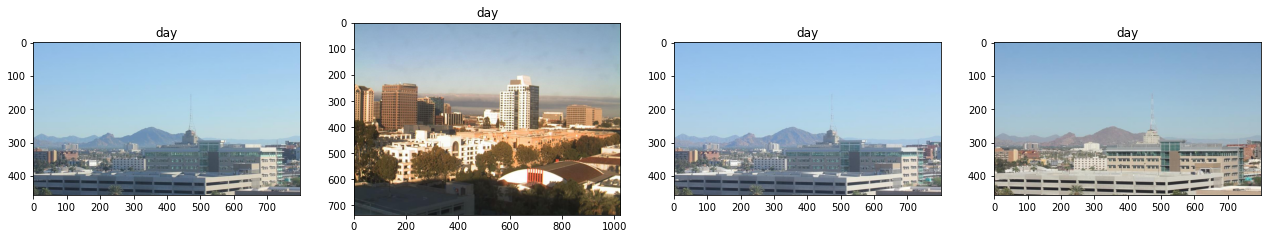

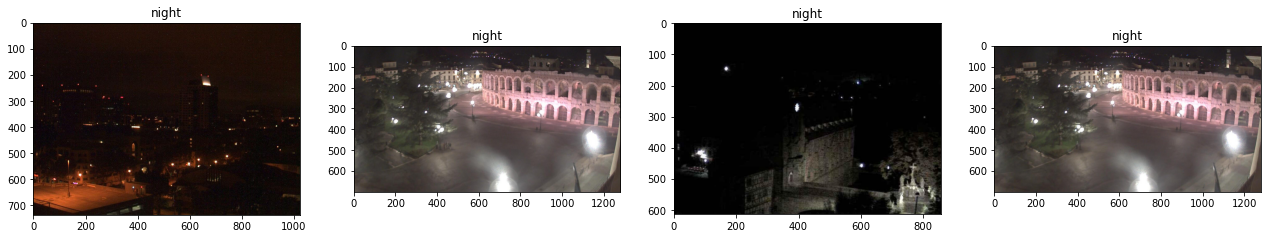

In [63]:
# 첫 4장 이미지 보기
# for day
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
for i, test_day_path in enumerate(test_day_paths[:4]):
    image = mpimg.imread(test_day_path)
    axes[i].imshow(image)
    axes[i].set_title('day')
    
# for night
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
for i, test_night_path in enumerate(test_night_paths[:4]):
    image = mpimg.imread(test_night_path)
    axes[i].imshow(image)
    axes[i].set_title('night')

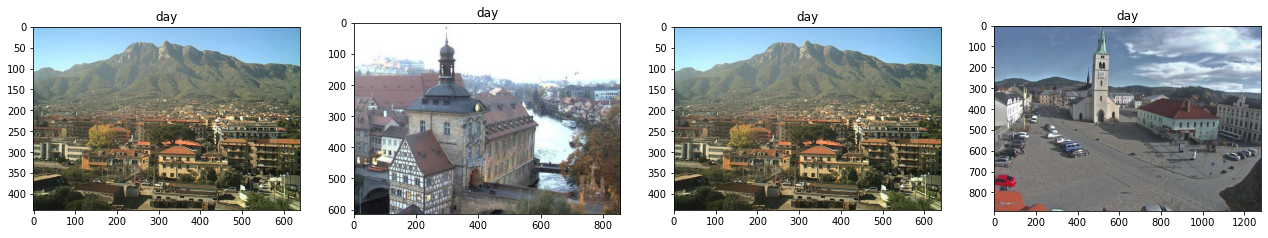

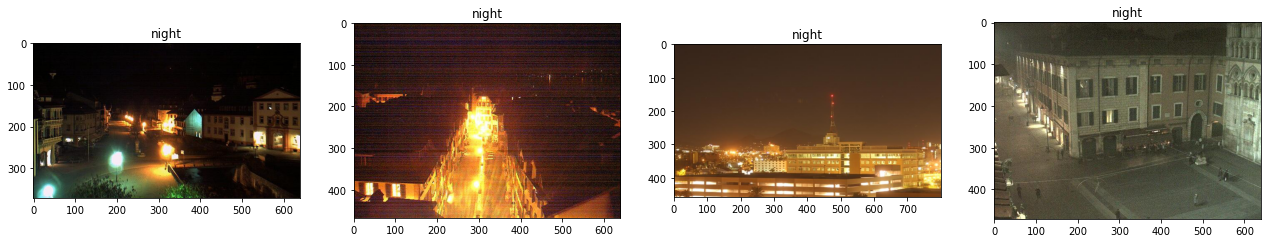

In [64]:
# random하게 4장 이미지 보기
# 첫 4장 이미지 보기
# for day
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
for i in range(4):
    rand_i = np.random.randint(0, len(train_day_paths))
    image = mpimg.imread(train_day_paths[rand_i])
    axes[i].imshow(image)
    axes[i].set_title('day')
    
# for night
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
for i in range(4):
    rand_i = np.random.randint(0, len(train_day_paths))
    image = mpimg.imread(train_night_paths[rand_i])
    axes[i].imshow(image)
    axes[i].set_title('night')

## 전처리(Preprocessing)

### 데이터 적재

In [96]:
image_dir_training

'./day_night_images/training'

In [110]:
import os

In [111]:
def load_dataset(image_dir):
    image_list = []
    label_types = ['day', 'night']
    
    for label_type in label_types:
        file_paths = glob.glob(os.path.join(image_dir, label_type, '*.jpg'))
        for file_path in file_paths:
            image = mpimg.imread(file_path)
            image_list.append((image, label_type)) 
            
    return image_list

train_image_list = load_dataset(image_dir_training)            
test_image_list = load_dataset(image_dir_test)            

In [112]:
print("train len:", len(train_image_list))
print("0번째 train image shape:", train_image_list[0][0].shape)
print("0번째 train image label:", train_image_list[0][1])

# train len: 240
# 0번째 train image shape: (458, 800, 3)
# 0번째 train image label: day

train len: 240
0번째 train image shape: (458, 800, 3)
0번째 train image label: day


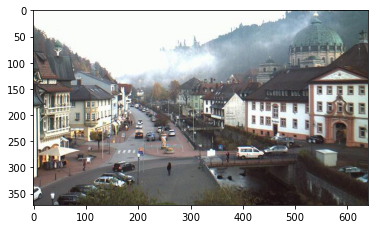

In [93]:
plt.imshow(train_image_list[100][0])

### 표준화 (Resize, Label Encoding)

In [100]:
# 입력 이미지를 resize
# width:1200, height:600
def resized_input(image):
    resized_image = cv2.resize(image, (1200, 600))
    return resized_image

In [101]:
# label encoding
# day -> 1
# night -> 0

def label_encode(label):  # day or night
    val = 0
    if label == 'day':
        val = 1
    else:
        val = 0
        
    return val

In [115]:
def preprocess(image_lists):
    preprocessed_list = []
    for image_list in image_lists:
        image = image_list[0]  # image
        label = image_list[1]  # label

        preprocessed_image = resized_input(image)
        preprocessed_label = label_encode(label)
        preprocessed_list.append((preprocessed_image, preprocessed_label))
    
    return preprocessed_list

preprocessed_train_list = preprocess(train_image_list)
preprocessed_test_list = preprocess(test_image_list)

In [116]:
len(preprocessed_train_list), len(preprocessed_test_list)

(240, 160)

In [118]:
preprocessed_train_list[10][0].shape, preprocessed_train_list[10][1]

((600, 1200, 3), 1)

## 특성추출(Feature Extraction)

- 밝기 정보 추출

Text(0.5, 1.0, 'v channel')

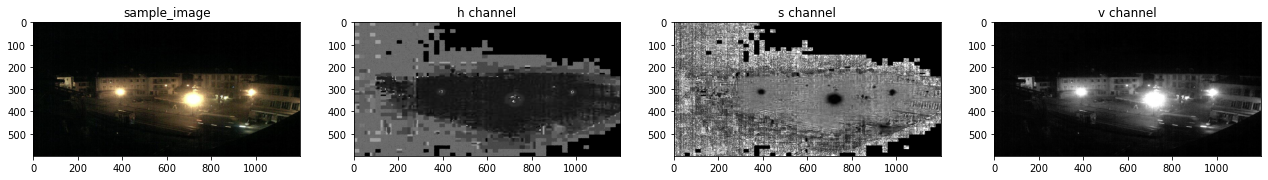

In [134]:
# HSV: H(색상), S(채도), V(밝기)
index = 137
sample_image = preprocessed_train_list[index][0]
sample_label = preprocessed_train_list[index][1]

hsv = cv2.cvtColor(sample_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))

# original image
axes[0].imshow(sample_image)
axes[0].set_title('sample_image')

# h
axes[1].imshow(h, cmap='gray')
axes[1].set_title('h channel')

# s
axes[2].imshow(s, cmap='gray')
axes[2].set_title('s channel')

# v
axes[3].imshow(v, cmap='gray')
axes[3].set_title('v channel')

In [126]:
sample_label

0

In [122]:
# sample image에 대한 평균 밝기값을 출력
v.sum() / v.size

27.685306944444445

In [124]:
v.size == v.shape[0] * v.shape[1]

True

In [133]:
def average_brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    avg_brightness = v.sum() / v.size
    
    return avg_brightness

## 분류(Classify) 
- 평균 밝기값을 기준으로 day 또는 night 인지를 예측

In [186]:
def predict_label(image):  # 시험해볼 이미지
    avg = average_brightness(image)
    
    threshold = 99
    
    if avg > threshold:
        predicted_label = 1  # day
    else:
        predicted_label = 0  # night
        
    return predicted_label

## 테스트 (Measure Accuracy)

In [188]:
wellclassified_list = []
missclassified_list = []

for test_item in preprocessed_test_list:
    image = test_item[0]  # image
    label = test_item[1]  # label
    
    # 예측 (분류, classify)
    predict = predict_label(image)
    
    if (label == predict):
        wellclassified_list.append((image, predict, label))
    else:
        missclassified_list.append((image, predict, label))
        
# Accuracy(correct / total)
accuracy = len(wellclassified_list) / len(preprocessed_test_list)
accuracy

0.9375

### 잘못 분류된 이미지 시각화 하기

0 average brightness : 98.88646944444444
1 average brightness : 93.18199444444444
2 average brightness : 108.24727222222222
3 average brightness : 106.49033333333334


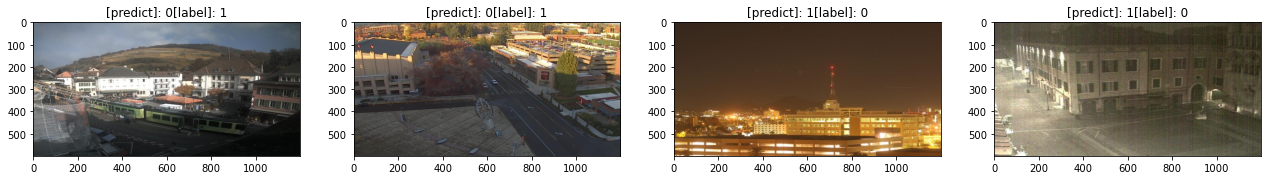

In [189]:
# random하게 4장 이미지 보기
# 첫 4장 이미지 보기
# for day
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
for i in range(4):
    rand_i = np.random.randint(0, len(missclassified_list))
    image = missclassified_list[rand_i][0]
    predict = missclassified_list[rand_i][1]
    label = missclassified_list[rand_i][2]
    
    axes[i].imshow(image)
    axes[i].set_title('[predict]: ' + str(predict) + '[label]: ' + str(label))
    
    print(i, 'average brightness :', average_brightness(image))